In [1]:
# Importing Required Pakages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the csv file using read_csv method
data = pd.read_csv("EDMDATA.csv")
print(data.head())

    I  Ton    P   V      MRR     TWR
0  10  100  0.3  40   4.9550  0.1011
1  10  100  0.5  50   8.8301  0.0849
2  10  100  0.7  60   8.7326  0.2138
3  10  200  0.3  50  11.0117  0.2752
4  10  200  0.5  60   9.8526  0.1894


In [27]:
# Finding columns name
data.columns

Index(['I', 'Ton', 'P', 'V', 'MRR', 'TWR'], dtype='object')

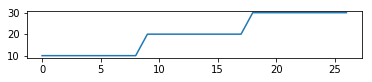

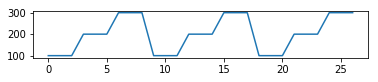

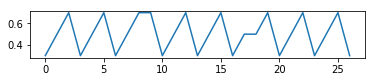

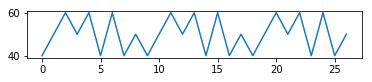

In [28]:
# Here i am ploting the graphs and finding variations
plt.subplot(4,1,1)
plt.plot(data['I'])
plt.show()
plt.subplot(4,1,2)
plt.plot(data['Ton'])
plt.show()
plt.subplot(4,1,3)
plt.plot(data['P'])
plt.show()
plt.subplot(4,1,4)
plt.plot(data['V'])
plt.show()

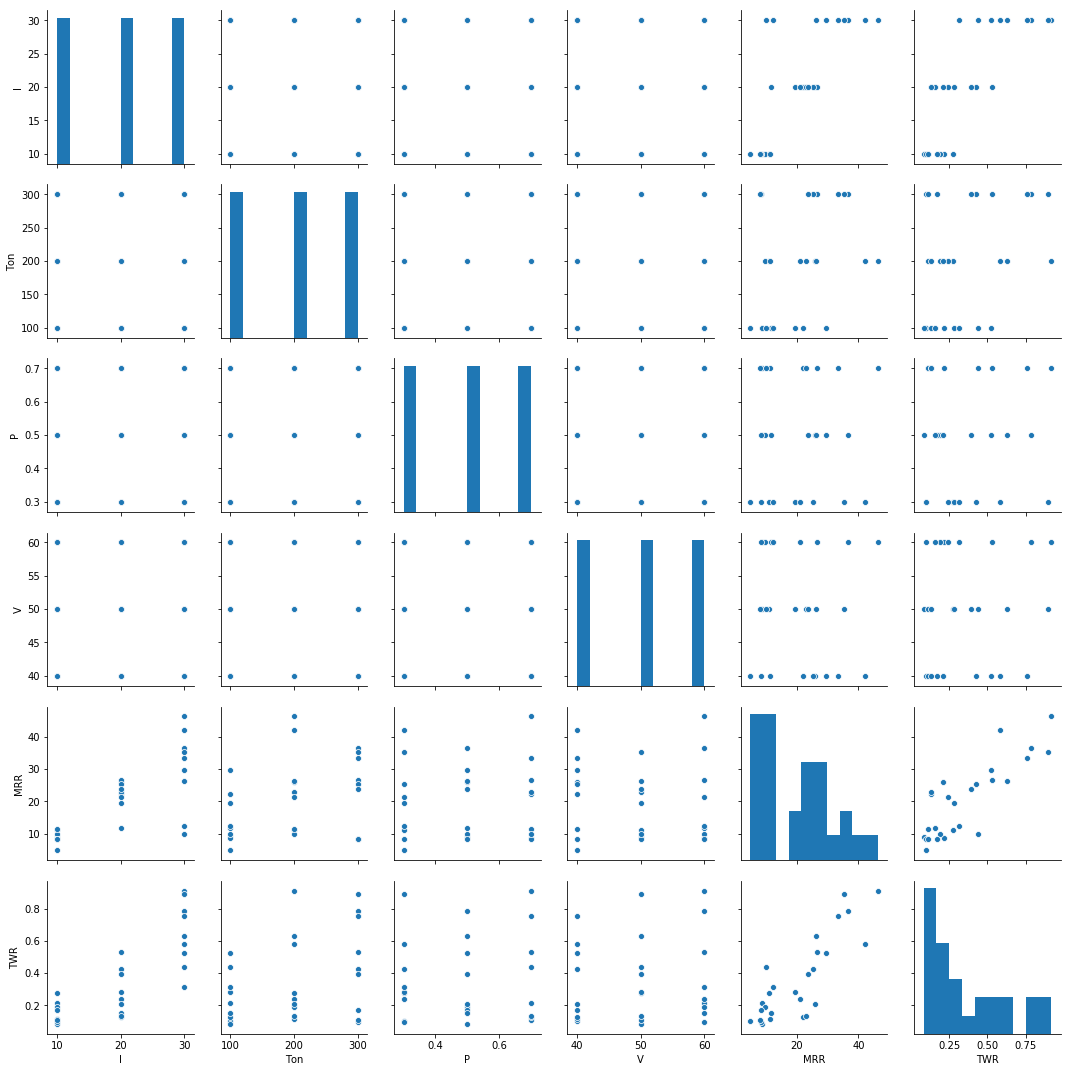

In [30]:
sns.pairplot(data)
plt.show()

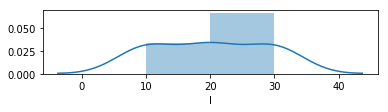

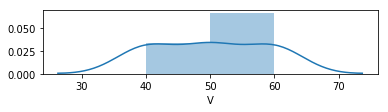

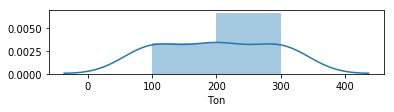

In [29]:
plt.subplot(3,1,1)
sns.distplot(data['I'])
plt.show()
plt.subplot(3,1,2)
sns.distplot(data['V'])
plt.show()
plt.subplot(3,1,3)
sns.distplot(data['Ton'])
plt.show()

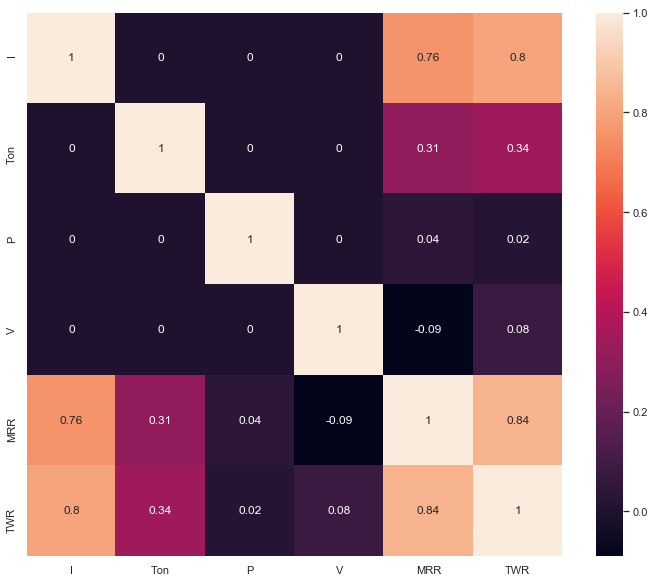

In [31]:
# finding the correlation 
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=correlation_matrix, annot=True)

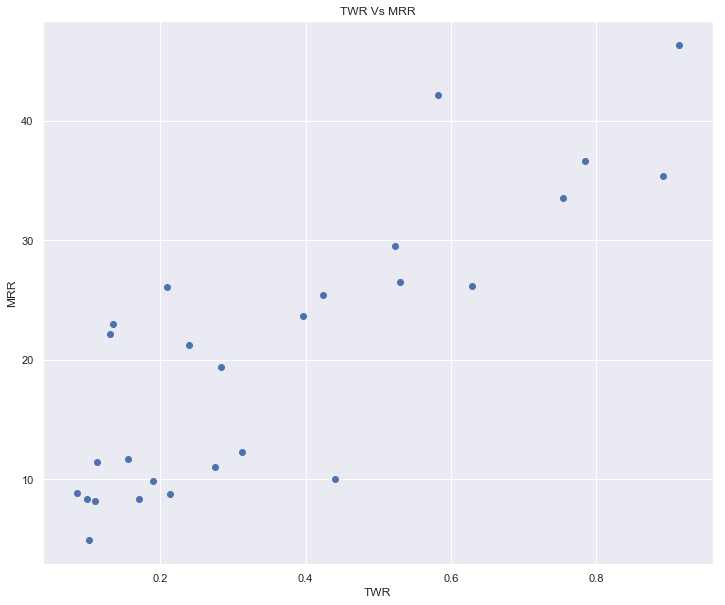

In [47]:
# Ploting the graph between two output labels
plt.scatter(data['TWR'],data['MRR'])
plt.xlabel("TWR")
plt.ylabel("MRR")
plt.title("TWR Vs MRR")
plt.show()
#plt.scatter(data['I'],data['TWR'])

In Above figure we are finding the relation between TWR and MRR.From that graph TWR Low and MRR high at 0.58 and 43 approximately we will get better.

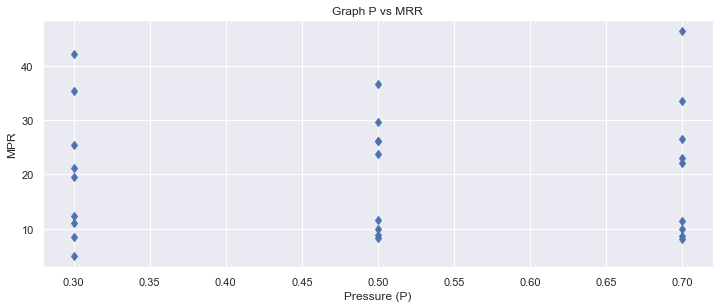

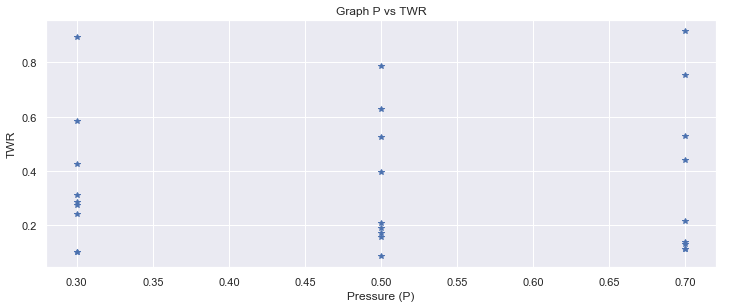

In [57]:
plt.subplot(2,1,1)
plt.plot(data['P'],data['MRR'],"d")
plt.title("Graph P vs MRR")
plt.xlabel("Pressure (P)")
plt.ylabel("MPR")
plt.show()

plt.subplot(2,1,2)
plt.plot(data['P'],data['TWR'],'*')
plt.title("Graph P vs TWR")
plt.xlabel("Pressure (P)")
plt.ylabel("TWR")
plt.show()

## K - Neartest Neighbors
- For any algorithm always target label or column must be one label or column

## Phase-1
- MRR As a output label

In [58]:
# import KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [62]:
# Devide the input labels and output labels
# 1. Here i am taking I,Ton,P and V as input labels
# 2. MRR as considering Output label
x = data[['I','Ton','P','V']]
y = data['MRR']

In [63]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

In [72]:
# train the model using fit method
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [73]:
pred = knn.predict(x)
print(pred)

[16.97468 10.7231  10.7231  15.29786 15.29786 16.27524 15.00906 14.80296
 15.00906 17.20866 14.40966 12.1801  21.48608 22.26    25.76426 20.66794
 25.26912 23.81976 17.20866 18.66566 16.578   32.7264  25.29402 25.76426
 26.10736 30.928   30.928  ]


In [74]:
from sklearn.metrics import r2_score
r2_score(y,pred)

0.5511202727327857

## Phase-2 
- TWR as a output label

In [75]:
## Here i am taking TWR as a Output label
x = data[['I','Ton','P','V']]
y1 = data['TWR']

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor()

In [77]:
# train the model by using fit method
knn1.fit(x,y1)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [78]:
y_pred = knn1.predict(x)

In [79]:
from sklearn.metrics import r2_score
r2_score(y1,y_pred)

0.5779152598983281

By using KNN Algorithm we got only less amount of accuracy so we are taking into another algorithm

# Random Forest

## Phase-1
- Here i am using TWR as output label

In [81]:
data1 = pd.read_csv("EDMDATA.csv")
data1.head()

,I,Ton,P,V,MRR,TWR
0,10,100,0.3,40,4.9550,0.1011
1,10,100,0.5,50,8.8301,0.0849
2,10,100,0.7,60,8.7326,0.2138
3,10,200,0.3,50,11.0117,0.2752
4,10,200,0.5,60,9.8526,0.1894


In [82]:
x = data[['I','Ton','P','V']]
y = data['MRR']

In [83]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor()

In [84]:
# train the model by using fit method
tree.fit(x,y)

C:\Users\RANGA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
predict_data = tree.predict(x)

In [86]:
from sklearn.metrics import r2_score
r2_score(y,predict_data)

0.9342058820163731

In [87]:
tree.predict([[10,100,0.3,40]])

array([6.6292])

For this algorithm, I got better accuracy compare to KNN Algorithm

## Phase-2
- Here i am taking TWR as a output label

In [88]:
x = data[['I','Ton','P','V']]
y1 = data['TWR']

In [90]:
# Train the model bys using fit method
tree.fit(x,y1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
# test the model by using predict method
y_predict = tree.predict(x)

In [93]:
# finding the accuracy using r2_score
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y1,y_predict)

0.9491288459294277

In [95]:
# mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
mean_squared_error(y1,y_predict)

0.0032701515666666656

# Decision Tree

## Phase-1

In [97]:
import pandas as pd
edmdata = pd.read_csv("EDMDATA.csv")
print(edmdata.head())

    I  Ton    P   V      MRR     TWR
0  10  100  0.3  40   4.9550  0.1011
1  10  100  0.5  50   8.8301  0.0849
2  10  100  0.7  60   8.7326  0.2138
3  10  200  0.3  50  11.0117  0.2752
4  10  200  0.5  60   9.8526  0.1894


In [98]:
x = edmdata[['I','Ton','P','V']]
y = edmdata['MRR']

In [99]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor()

In [100]:
# train the model using fit method
dec.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [101]:
# test the model
predict_output = dec.predict(x)

In [102]:
# check the accuracy and MSE 
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y,predict_output)

1.0

In [103]:
# finding MSE
mean_squared_error(y,predict_output)

0.0

## Phase -2 

In [104]:
x = edmdata[['I','Ton','P','V']]
y1 = edmdata['TWR']

In [105]:
dec.fit(x,y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [106]:
y_predt = dec.predict(x)

In [107]:
r2_score(y1,y_predt)

1.0

In [108]:
mean_squared_error(y1,y_predt)

0.0

By observing from above all r2_score I got 100% in DecisionTree 